In [136]:
import pandas as pd
import numpy as mp
import matplotlib as mlt
import matplotlib.pyplot as plt

In [137]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions')
countries = tables[1]
countries.drop(countries.index[67], inplace=True)
countries.drop(countries.index[0:3], inplace=True)
countries

Country[20] Fossil CO2 emissions(Mt CO2)                   \
        Country[20]                         1990    2005     2017   
3       Afghanistan                        2.546   1.063   11.422   
4           Albania                        6.583   4.196    5.026   
5           Algeria                       65.677  98.197  159.929   
6            Angola                        5.851  15.975   30.876   
7          Anguilla                        0.006   0.014    0.028   
..              ...                          ...     ...      ...   
207         Vietnam                       20.182  99.231  218.729   
208  Western Sahara                        0.144   0.227    0.276   
209           Yemen                        6.887  21.768   12.503   
210          Zambia                        2.955   2.457    4.967   
211        Zimbabwe                       17.178  11.388   12.087   

    Fossil CO2 emissions                          2017 – Fossil CO2 emissions  \
        2017(% of world) 2017 vs 1990: change (%) Per land area(t CO2/km2/yr)   
3                  0.03%                   348.6%                        18.0   
4                  0.01%                   -23.7%                       175.0   
5                  0.43%                   143.5%                        67.0   
6                  0.08%                   427.7%                        25.0   
7                  0.00%                   366.7%                       308.0   
..                   ...                      ...                         ...   
207                0.59%                   983.8%                       660.0   
208                0.00%                    91.7%                         1.0   
209                0.03%                    81.5%                        24.0   
210                0.01%                    68.1%                         7.0   
211                0.03%                   -29.6%                        31.0   

                               2018 CO2 emissions[21]                           
    Per capita(t CO2/cap/yr) Total including LUCF[22] Total excluding LUCF[23]  
3                        0.3                     7.59                     7.44  
4                        1.7                     5.32                     5.56  
5                        3.9                   151.87                   151.67  
6                        1.0                    62.93                    27.34  
7                        1.9                      NaN                      NaN  
..                       ...                      ...                      ...  
207                      2.3                   245.36                   257.86  
208                      0.5                      NaN                      NaN  
209                      0.4                     9.31                     9.31  
210                      0.3                    40.47                     7.74  
211                      0.7                    99.43                    12.27  

[208 rows x 10 columns]

In [138]:
countries.columns = ['country', '1990', '2005', '2017', 'per_of_world', '2017vs1990_change', '2017co2_area', '2017co2_capita', '2018co2totalinc', '2018co2totalexc']
countries

,country,1990,2005,2017,per_of_world,2017vs1990_change,2017co2_area,2017co2_capita,2018co2totalinc,2018co2totalexc
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


Graph 1: CO2 of the bigger countries

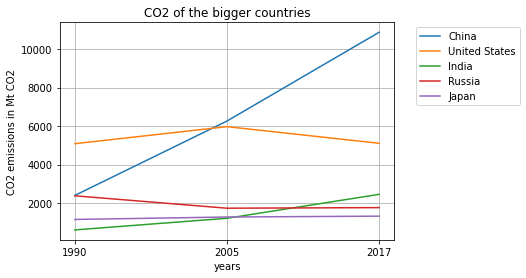

In [139]:
biggest_co2 = countries.sort_values(by=['2017'], ascending=False).iloc[0:5]
n = countries.columns.get_loc('per_of_world')

fig, ax = plt.subplots()

for index, row in biggest_co2.iterrows():
  ax.plot(biggest_co2.columns[1:n],row[1:n], label=row[0])

ax.set(title='CO2 of the bigger countries', xlabel='years', ylabel='CO2 emissions in Mt CO2')
ax.legend(bbox_to_anchor=(1.05,1))
plt.grid()
plt.show()

Graph 2: worst and best changers

In [160]:
n = countries.columns.get_loc('per_of_world') 
for i in range(n - 1):
  countries[f'{countries.columns[i+1]}_relative'] = (countries.loc[:,countries.columns[i+1]] / countries.loc[:,'1990']) *100

countries

,country,1990,2005,2017,per_of_world,2017vs1990_change,2017co2_area,2017co2_capita,2018co2totalinc,2018co2totalexc,1990_relative,2005_relative,2017_relative
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44,100.0,41.751767,448.625295
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56,100.0,63.739936,76.348170
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67,100.0,149.515051,243.508382
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34,100.0,273.030251,527.704666
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN,100.0,233.333333,466.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86,100.0,491.680706,1083.782579
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN,100.0,157.638889,191.666667
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31,100.0,316.073762,181.544940
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74,100.0,83.147208,168.087986


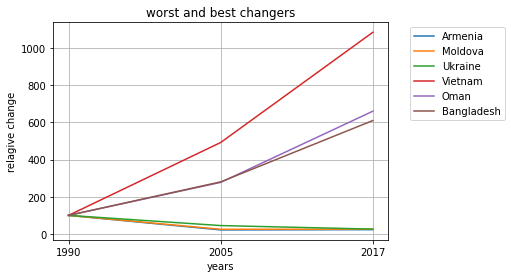

In [159]:
def min_emissions(row):
  return row['1990'] > 5


good_co2 = countries.loc[lambda row: min_emissions(row)].sort_values(by=['2017_relative'], ascending=True).iloc[0:3]
bad_co2 = countries.loc[lambda row: min_emissions(row)].sort_values(by=['2017_relative'], ascending=False).iloc[0:3]
m = countries.columns.get_loc('1990_relative')

fig, ax = plt.subplots()

for index, row in good_co2.iterrows():
  ax.plot(good_co2.columns[1:n], row[m:],label=row[0])

for index, row in bad_co2.iterrows():
  ax.plot(bad_co2.columns[1:n], row[m:],label=row[0])

ax.set(title='worst and best changers', xlabel='years', ylabel='relagive change')
ax.legend(bbox_to_anchor=(1.05,1))
plt.grid()
plt.show()